In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train_news.csv')
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [4]:
data.drop(columns=['Unnamed: 0','id','written_by'],inplace=True)


In [5]:
data.isnull().sum()

headline    558
news         39
label         0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(20203, 3)

In [8]:
data['article']=data['news']+" "+data['headline']

In [9]:
df=data[['article','label']]
df.head()

,article,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1


In [10]:
df['article']=df['article'].apply(lambda x: x.lower())

In [11]:
import string
from string import digits
from nltk.corpus import stopwords

stop_words=stopwords.words('english')
punct=string.punctuation
print('Punctuations: ',punct)
print('Digits: ',digits)
print('Stop Words: ',stop_words)

Punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Digits:  0123456789
Stop Words:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'o

In [12]:
def dig_rml(text):
    return text.translate(str.maketrans("","",digits))
def punct_rml(sent):
    return sent.translate(str.maketrans("","",punct))
def stp_rml(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

In [13]:
df['article']=df['article'].apply(lambda x: dig_rml(x))
df['article']=df['article'].apply(lambda x: punct_rml(x))
df['article']=df['article'].apply(lambda x: stp_rml(x))

In [14]:
df['article'][2]

'sunday abc’s “this week” discussing republican plan repeal replace obamacare sen tom cotton warned gop house members “do walk plank vote bill cannot pass senate face consequences vote ” added “the bill probably fixed it’s going take lot carpentry framework ” hill follow pam key twitter pamkeynen cotton house ’do walk plank vote bill cannot pass senate’ breitbart'

In [64]:
print(10387/20203)
print(9816/20203)

0.514131564619116
0.48586843538088403


0    10387
1     9816
Name: label, dtype: int64


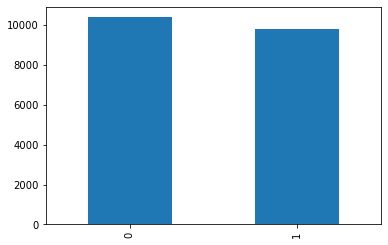

In [15]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar')

print(df['label'].value_counts())

In [16]:
df['Length']=df['article'].str.len()
df.head()

,article,label,Length
0,washington — sonny perdue’s telling georgians ...,0,5571
1,houston — venezuela plan tactical approach des...,0,4260
2,sunday abc’s “this week” discussing republican...,0,364
3,augusta — beleaguered republican governor main...,0,4689
4,finian cunningham written extensively internat...,1,6741


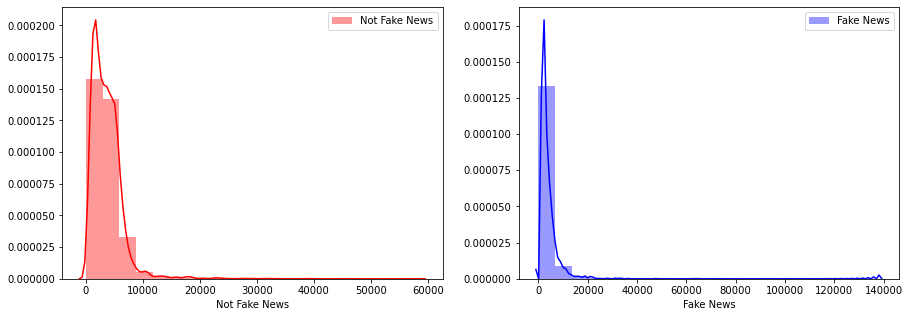

In [17]:
import seaborn as sns
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df[df['label']==0]['Length'],bins=20,label='Not Fake News',color='r',ax=ax[0])
ax[0].set_xlabel('Not Fake News')
ax[0].legend()
sns.distplot(df[df['label']==1]['Length'],bins=20,label='Fake News',color='b',ax=ax[1])
ax[1].set_xlabel('Fake News')
ax[1].legend()

In [50]:
from collections import Counter
count1 = Counter(" ".join(df[df['label']==0]["article"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of not fake", 1 : "count"})
count2 = Counter(" ".join(df[df['label']==1]["article"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of fake", 1 : "count_"})

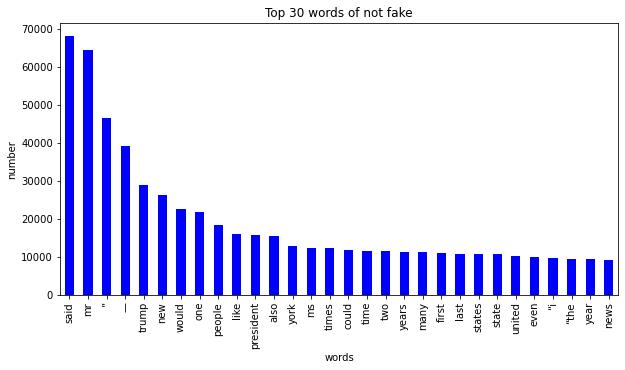

In [51]:
data1.plot.bar(legend = False, color = 'blue',figsize = (10,5))
y_pos = np.arange(len(data1["words of not fake"]))
plt.xticks(y_pos, data1["words of not fake"])
plt.title('Top 30 words of not fake')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

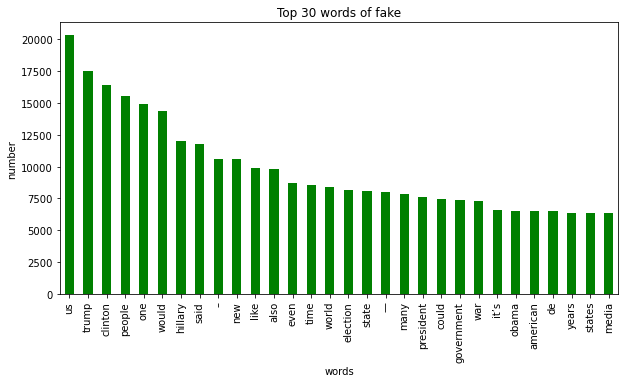

In [44]:
data2.plot.bar(legend = False, color = 'green', figsize = (10,5))
y_pos = np.arange(len(data2["words of fake"]))
plt.xticks(y_pos, data2["words of fake"])
plt.title('Top 30 words of fake')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

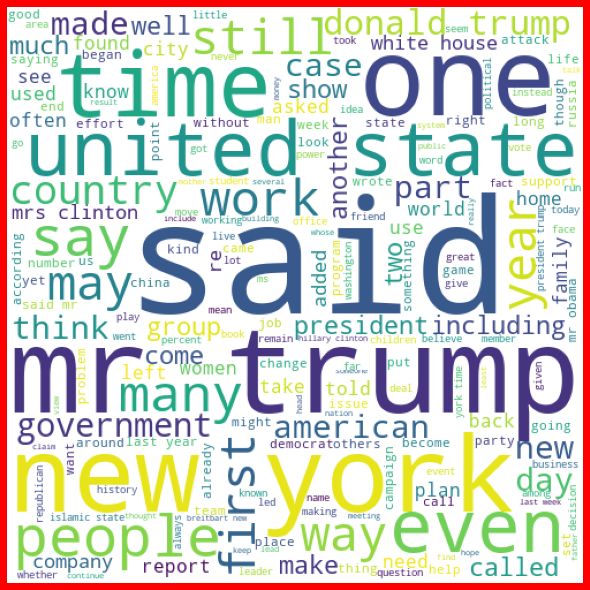

In [18]:
from wordcloud import WordCloud

not_fake=df['article'][df['label']==0]
cloud_notfake=WordCloud(width=500,height=500,background_color='white').generate(''.join(not_fake))
plt.figure(figsize=(8,8),facecolor='r')
plt.imshow(cloud_notfake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

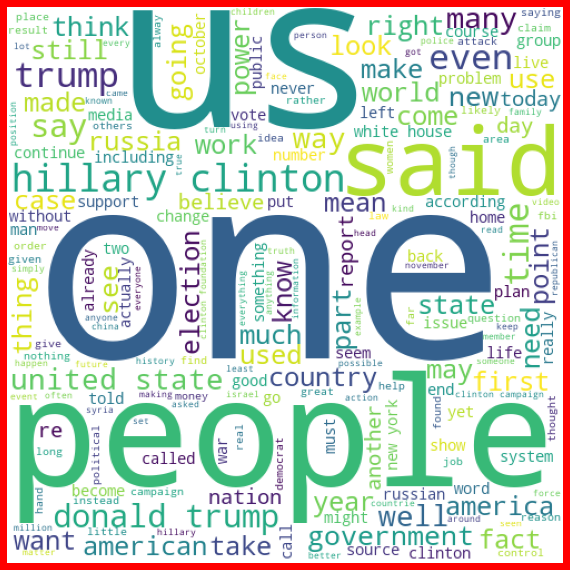

In [19]:
fake=df['article'][df['label']==1]
cloud_fake=WordCloud(width=500,height=500,background_color='white').generate(''.join(fake))
plt.figure(figsize=(8,8),facecolor='r')
plt.imshow(cloud_fake)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

In [20]:
x=df['article']
y=df['label']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,log_loss

from sklearn.pipeline import Pipeline

In [61]:
def model(x,y,model_type):
    pipe=Pipeline([('tfidf',TfidfVectorizer()),('model',model_type)])
    model_fit=pipe.fit(x_train,y_train)
    predt=model_fit.predict(x_test)
    print('Accuracy : ',accuracy_score(y_test,predt))
    print('Classification Report : ',classification_report(y_test,predt))
    print('Confussion matrix : ',confusion_matrix(y_test,predt))
    print('Log Loss of the model: ',log_loss(y_test,predt))
    conf=confusion_matrix(y_test,predt)
    ax=plt.subplot()
    sns.heatmap(conf,ax=ax,annot=True)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title('Confussion Matrix')
    ax.xaxis.set_ticklabels(['Not fake','Fake'])
    ax.yaxis.set_ticklabels(['Not Fake','Fake'])
    plt.show()
    

Accuracy :  0.9536380135291206
Classification Report :                precision    recall  f1-score   support

           0       0.96      0.95      0.95      3102
           1       0.95      0.96      0.95      2959

    accuracy                           0.95      6061
   macro avg       0.95      0.95      0.95      6061
weighted avg       0.95      0.95      0.95      6061

Confussion matrix :  [[2950  152]
 [ 129 2830]]
Log Loss of the model:  1.6013063365417088


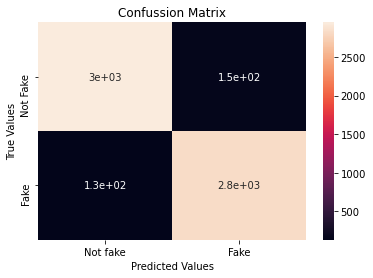

In [62]:
from sklearn.linear_model import LogisticRegression
model(x_train,y_train,LogisticRegression())

Accuracy :  0.9356541824781389
Classification Report :                precision    recall  f1-score   support

           0       0.94      0.94      0.94      3102
           1       0.93      0.94      0.93      2959

    accuracy                           0.94      6061
   macro avg       0.94      0.94      0.94      6061
weighted avg       0.94      0.94      0.94      6061

Confussion matrix :  [[2902  200]
 [ 190 2769]]
Log Loss of the model:  2.222452188335458


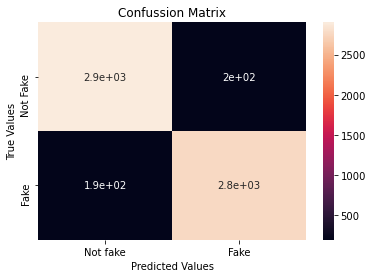

In [31]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
model(x_train,y_train,dct)


Accuracy :  0.9344992575482594
Classification Report :                precision    recall  f1-score   support

           0       0.92      0.96      0.94      3102
           1       0.96      0.91      0.93      2959

    accuracy                           0.93      6061
   macro avg       0.94      0.93      0.93      6061
weighted avg       0.94      0.93      0.93      6061

Confussion matrix :  [[2982  120]
 [ 277 2682]]
Log Loss of the model:  2.2623313282414075


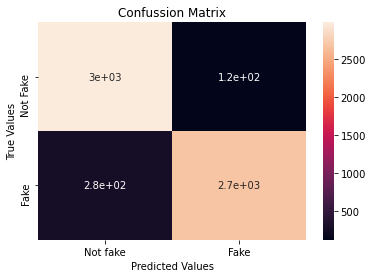

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model(x_train,y_train,rf)

Accuracy :  0.8325358851674641
Classification Report :                precision    recall  f1-score   support

           0       0.75      1.00      0.86      3102
           1       0.99      0.66      0.79      2959

    accuracy                           0.83      6061
   macro avg       0.87      0.83      0.83      6061
weighted avg       0.87      0.83      0.83      6061

Confussion matrix :  [[3091   11]
 [1004 1955]]
Log Loss of the model:  5.784007067547611


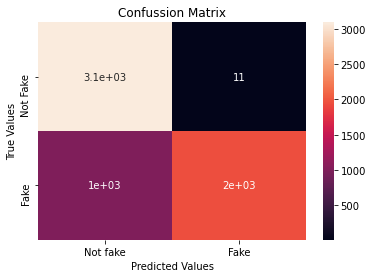

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
model(x_train,y_train,nb)

Accuracy :  0.8562943408678436
Classification Report :                precision    recall  f1-score   support

           0       0.82      0.92      0.87      3102
           1       0.90      0.79      0.84      2959

    accuracy                           0.86      6061
   macro avg       0.86      0.85      0.86      6061
weighted avg       0.86      0.86      0.86      6061

Confussion matrix :  [[2853  249]
 [ 622 2337]]
Log Loss of the model:  4.963450476774018


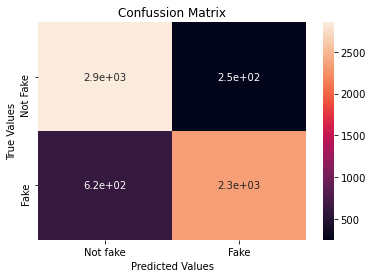

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model(x_train,y_train,knn)

Accuracy :  0.960732552384095
Classification Report :                precision    recall  f1-score   support

           0       0.97      0.95      0.96      3102
           1       0.95      0.97      0.96      2959

    accuracy                           0.96      6061
   macro avg       0.96      0.96      0.96      6061
weighted avg       0.96      0.96      0.96      6061

Confussion matrix :  [[2949  153]
 [  85 2874]]
Log Loss of the model:  1.3562697773297423


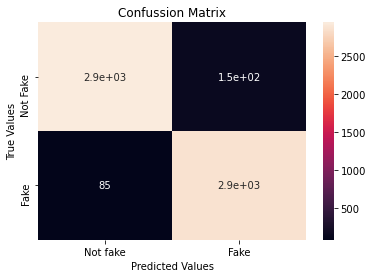

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
grb=GradientBoostingClassifier()
model(x_train,y_train,grb)

Accuracy :  0.9556178848374856
Classification Report :                precision    recall  f1-score   support

           0       0.96      0.95      0.96      3102
           1       0.95      0.96      0.95      2959

    accuracy                           0.96      6061
   macro avg       0.96      0.96      0.96      6061
weighted avg       0.96      0.96      0.96      6061

Confussion matrix :  [[2943  159]
 [ 110 2849]]
Log Loss of the model:  1.532924927606398


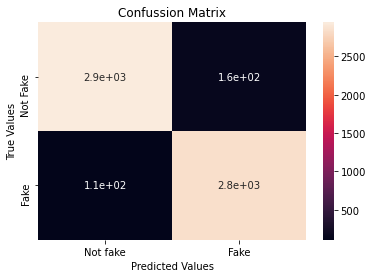

In [36]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
model(x_train,y_train,adb)